# 4.9 Intro to Data Visualization with Python
## Contents
## 1. Import libraries&data sets
## 2. Creating Bar Charts
## 3. Exporting Charts
## 4. Creating Histograms and Scatterplots
## 5. Creating Line Charts


## 1. Import libraries&data sets

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Create project folder path
path=r'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/11-2024 Instacart Basket Analysis'

In [7]:
path

'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/11-2024 Instacart Basket Analysis'

In [9]:
# Import "orders_products_merged_grouped.pkl"
ords_prods_merged=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_grouped.pkl'))

In [11]:
# Check the output
ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    object 
 1   user_id                     int64  
 2   customers_order_count       int64  
 3   orders_day_of_week          int64  
 4   order_hour_of_day           int64  
 5   days_since_prior_order      float64
 6   product_id                  int64  
 7   add_to_cart_order           int64  
 8   reordered                   int64  
 9   product_name                object 
 10  aisle_id                    int64  
 11  department_id               int64  
 12  prices                      float64
 13  max_order                   int64  
 14  loyalty_flag                object 
 15  spending_flag               object 
 16  avg_user_price              float64
 17  median_days_between_orders  float64
 18  frequency_flag              object 
dtypes: float64(4), int6

## 2. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

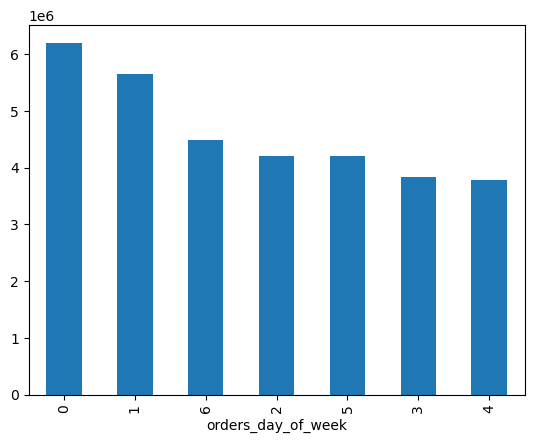

In [16]:
# Create a bar chart
ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

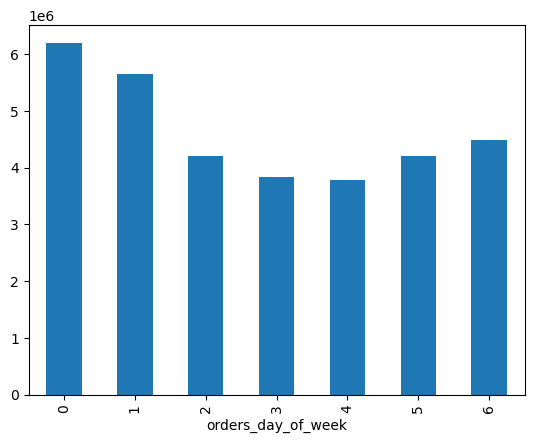

In [20]:
# Sort the bars in the chart according to their index order
ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [22]:
# Print frequency
ords_prods_merged['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [24]:
# Print frequency sorting by orders_day_of_week
ords_prods_merged['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

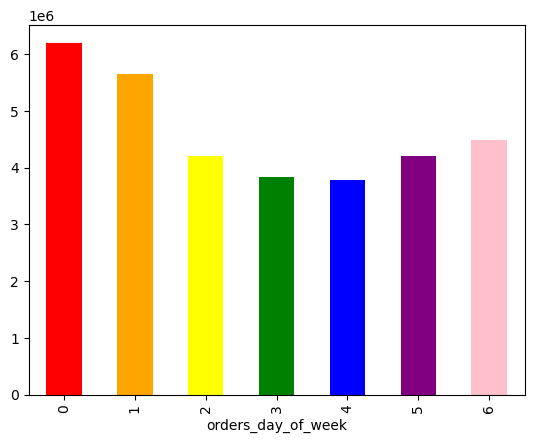

In [32]:
# Adding colors to the bars
# Sort the bars in the chart according to their index order
ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])

## 3. Exporting Charts

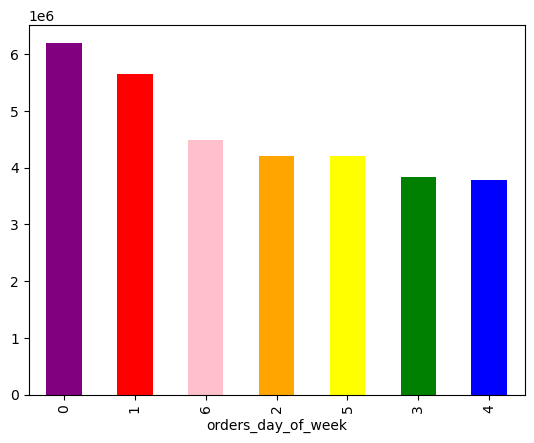

In [35]:
# Saving a chart in jupiter memory
bar = ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [37]:
# Export a chart outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 4. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

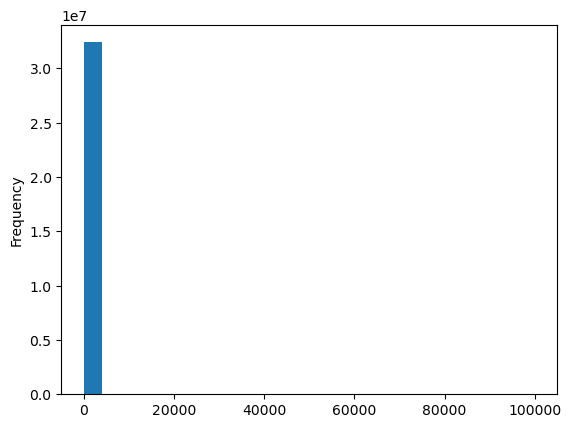

In [40]:
# Create histogram with column "prices"
ords_prods_merged['prices'].plot.hist(bins = 25)

In [45]:
# Check the descriptive statistics
ords_prods_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [49]:
# Further checks bc of odd max price
ords_prods_merged['prices'].mean()

11.980225638383445

In [51]:
ords_prods_merged['prices'].median()

7.4

In [53]:
ords_prods_merged['prices'].max()

99999.0

In [55]:
#### While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result.  
#### How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. 
#### This is also what’s breaking your histogram—having most values between 7 and 12 (see the median and mean again) 
#### but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value 
#### in another one. And this second bar is so tiny that you can’t even see it on the chart.

<Axes: xlabel='prices', ylabel='prices'>

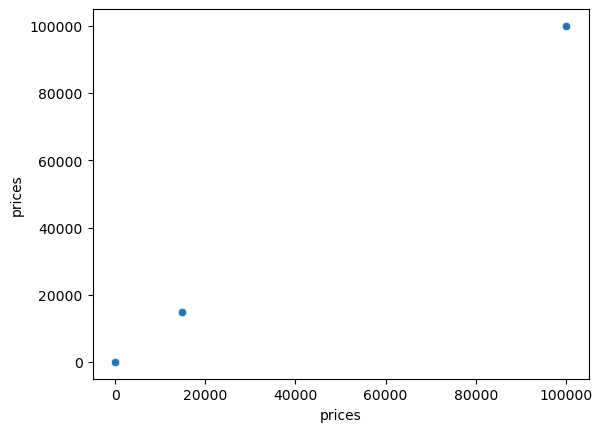

In [57]:
# Create a scatterplot to explore any outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [59]:
#### The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. 
#### However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. 
#### This close-to-100,000 value corresponds to the max value you identified in your checks. 
#### But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

In [63]:
# Check which items are more expensive as $100
ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,order_id,user_id,customers_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,spending_flag,avg_user_price,median_days_between_orders,frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,40,Regular customer,High spender,108.648299,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,40,Regular customer,High spender,108.648299,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,4,New customer,High spender,1154.792308,11.5,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,4,New customer,High spender,1154.792308,11.5,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,16,Regular customer,High spender,114.426619,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,25,Regular customer,High spender,351.141618,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,25,Regular customer,High spender,170.073770,12.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,25,Regular customer,High spender,170.073770,12.0,Regular customer
32380527,1916142,206049,1,2,17,0.0,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,5,New customer,High spender,938.031250,7.0,Frequent customer


In [65]:
# Mark outliers as missing values NaN
ords_prods_merged.loc[ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [67]:
# Check the result
ords_prods_merged['prices'].max()

25.0

In [69]:
# Find missing values (takes sum of Trues in a column)
ords_prods_merged.isnull().sum()

order_id                         0
user_id                          0
customers_order_count            0
orders_day_of_week               0
order_hour_of_day                0
days_since_prior_order           0
product_id                       0
add_to_cart_order                0
reordered                        0
product_name                     0
aisle_id                         0
department_id                    0
prices                        5127
max_order                        0
loyalty_flag                     0
spending_flag                    0
avg_user_price                   0
median_days_between_orders       0
frequency_flag                   0
dtype: int64

In [83]:
# Imputing missing values with mean values
# 1. Calculate the mean of the 'prices' column
mean_value = ords_prods_merged['prices'].mean()

In [89]:
# 2. Use fillna to replace NaN values with the calculated mean
ords_prods_merged['prices'].fillna(mean_value, inplace=True)

/var/folders/gn/b13h25pn5k1500kc2862p30r0000gp/T/ipykernel_77490/2011669413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ords_prods_merged['prices'].fillna(mean_value, inplace=True)


In [95]:
# Check the result
ords_prods_merged['prices'].isnull().sum()

0

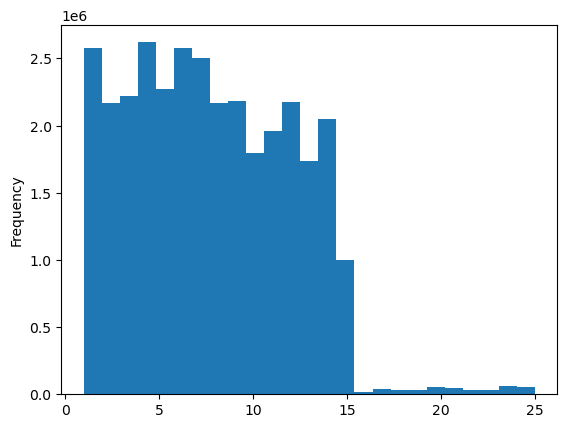

In [97]:
# Create histogram of "prices" column after data cleaning
hist=ords_prods_merged['prices'].plot.hist(bins = 25)

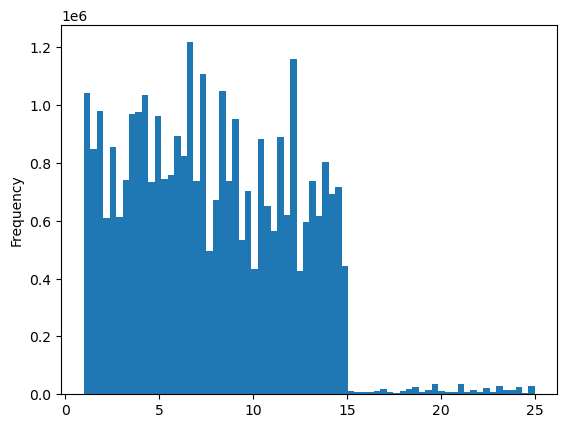

In [99]:
# To increase the level of granularity in the histogram, increase the number of bins to 70
hist_2=ords_prods_merged['prices'].plot.hist(bins = 70)

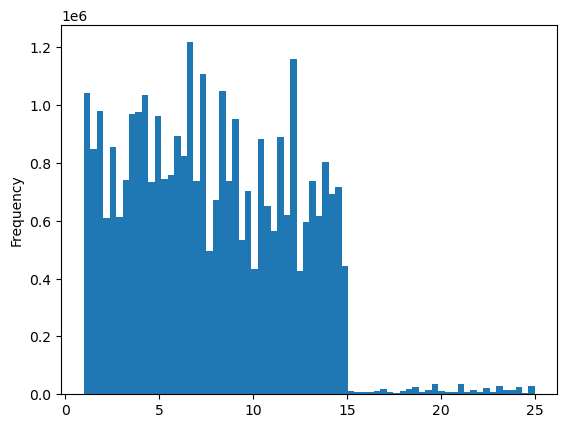

In [101]:
# Saving a histogramm in jupiter memory
hist = ords_prods_merged['prices'].plot.hist(bins = 70)

In [103]:
# Export a histogramm
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## 5. Creating Line Charts

### Sampling Data
#### 1. Set the seed for the random number generator.
#### 2. Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
#### 3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
#### 4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [128]:
# Create a sample 70/30
# 1. Setting the seed 4, for the random number generation
np.random.seed(4)
# 2. Create a list holding True/False values to the test np.random.rand<=0.7
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [117]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [123]:
# This function produces a list of random numbers between 0 and 1. Here, the argument is 10, so 10 random numbers are produced. 
# In the code above, the argument given is the length of your dataframe, so 32,434,212 numbers are produced.
np.random.rand(10)

array([0.06557465, 0.85698584, 0.24456371, 0.22683171, 0.17068366,
       0.27008946, 0.52534234, 0.83151571, 0.78153402, 0.0164016 ])

In [132]:
# Split your dataframe into two samples
# Store 70% of the sample in the dataframe big
big = ords_prods_merged[dev]
# Store 30% of the sample in the dataframe small
small = ords_prods_merged[~dev]

In [136]:
# Check the results
len(ords_prods_merged)

32404859

In [138]:
len(big)+len(small)

32404859

In [140]:
#### Since the numbers match, you can assume that your subsetting procedure was at least successful in the technical sense. 

In [142]:
# Reducing the sample to only those columns necessary for the chart: “prices” and “orders_day_of_week.
df_2 = small[['orders_day_of_week','prices']]

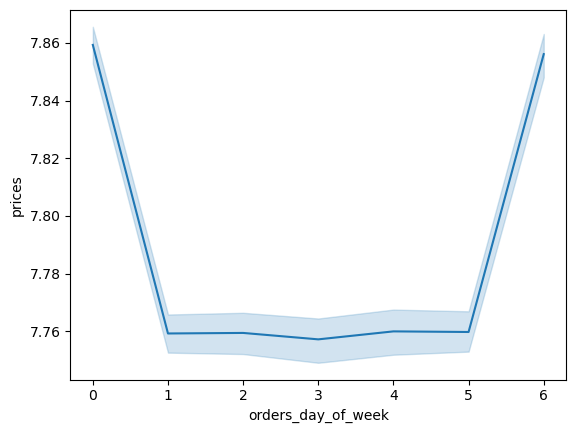

In [144]:
# Create the linechart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [146]:
### To check if the created line chart is representative: compare the line chart of the subset with the line chart of the entire dataframe 
### (or even the big sample).

In [148]:
# Export a line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linecahrt_prices_orders_dow.png'))